# Multivariate Normal Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats as stats
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)

Note to self: The following are just _points_ that are distributed in the $x$-$y$ plane. But if one is interested in fitting a 2D gaussian, which is a function of two variables that returns a scalar: $z \sim f(x,y|\theta)$. What is plotted below are the **inputs** but what we would like to see is a projection of the inputs and the **output** which is a 3D visualization

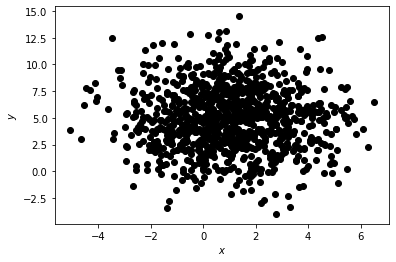

In [2]:
means = [1, 5]
std_devs = np.array([2, 3])
covariance = np.diag(std_devs ** 2)
n_samples = 1000

x, y = np.random.multivariate_normal(means, covariance, n_samples).T

fig, ax = plt.subplots()
ax.scatter(x, y, color="black")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$");

Try again following this example: https://stackoverflow.com/questions/21566379/fitting-a-2d-gaussian-function-using-scipy-optimize-curve-fit-valueerror-and-m

In [3]:
# Create x and y indices
x_range = [-15, 15]
y_range = [-15, 15]
n_samples = 1000
x, y = np.meshgrid(
    np.linspace(*x_range, n_samples + 1), np.linspace(*y_range, n_samples + 1)
)

In [4]:
def model(inputs, amplitude, mean_x, mean_y, sigma_x, sigma_y, offset):
    """
    2D Normal with offset
    Returns 1d array
    """
    (x, y) = inputs
    z = offset + amplitude * np.exp(
        -(((mean_x - x) / sigma_x) ** 2 + ((mean_y - y) / sigma_y) ** 2) / 2
    )
    return z.ravel()

In [5]:
observations = model(
    (x, y),
    amplitude=10,
    mean_x=means[0],
    mean_y=means[1],
    sigma_x=std_devs[0],
    sigma_y=std_devs[1],
    offset=10,
)
noise = 0.2 * np.random.normal(size=observations.shape)
data = observations + noise

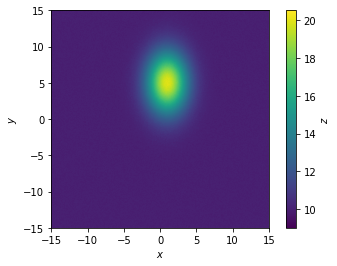

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(
    data.reshape(x.shape), extent=(x.min(), x.max(), y.min(), y.max()), origin="lower"
)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
fig.colorbar(im, label=r"$z$");

In [7]:
# init_params = (3,0,0,1,1,1)
# init_params = (10, means[0], means[1], std_devs[0],std_devs[1],10)
# params_opt, params_cov = optimize.curve_fit(model, (x, y), data, p0=init_params)

params_opt, params_cov = optimize.curve_fit(model, (x, y), data)

In [8]:
model_predictions = model((x, y), *params_opt)

In [9]:
print("True paramters:")
# amplitude=10, mean_x=means[0], mean_y=means[1], sigma_x=std_devs[0], sigma_y=std_devs[1], offset=10
for param in (10, means[0], means[1], std_devs[0], std_devs[1], 10):
    print(f"  {param}")

print("\nBest fit parameters")
for param in params_opt:
    print(f"  {param}")

True paramters:
  10
  1
  5
  2
  3
  10

Best fit parameters
  10.000749459824148
  0.9996774995019
  4.999902581612782
  2.0000446610432703
  2.999966059579273
  10.00026439420468


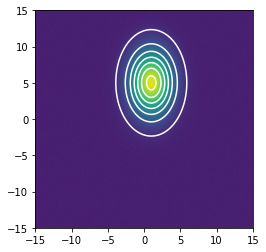

In [10]:
fig, ax = plt.subplots()
ax.imshow(
    data.reshape(x.shape), extent=(x.min(), x.max(), y.min(), y.max()), origin="lower"
)
ax.contour(x, y, model_predictions.reshape(x.shape), 8, colors="white")

---

In [11]:
x_feature, y_feature = np.random.multivariate_normal(means, covariance, n_samples).T

observations = model(
    (x_feature, y_feature),
    amplitude=10,
    mean_x=means[0],
    mean_y=means[1],
    sigma_x=std_devs[0],
    sigma_y=std_devs[1],
    offset=10,
)
noise = 0.2 * np.random.normal(size=observations.shape)
data = observations + noise

params_opt, params_cov = optimize.curve_fit(
    model, (x_feature, y_feature), data, bounds=(0, np.inf)
)

# model_predictions = model((x, y), *params_opt)
model_predictions = model((x, y), *params_opt)

print("True paramters:")
# amplitude=10, mean_x=means[0], mean_y=means[1], sigma_x=std_devs[0], sigma_y=std_devs[1], offset=10
for param in (10, means[0], means[1], std_devs[0], std_devs[1], 10):
    print(f"  {param}")

print("\nBest fit parameters")
for param in params_opt:
    print(f"  {param}")

True paramters:
  10
  1
  5
  2
  3
  10

Best fit parameters
  10.004661460671674
  0.9992824835554771
  5.007431489860528
  2.0110768672572994
  3.010804894494099
  9.970810020702583


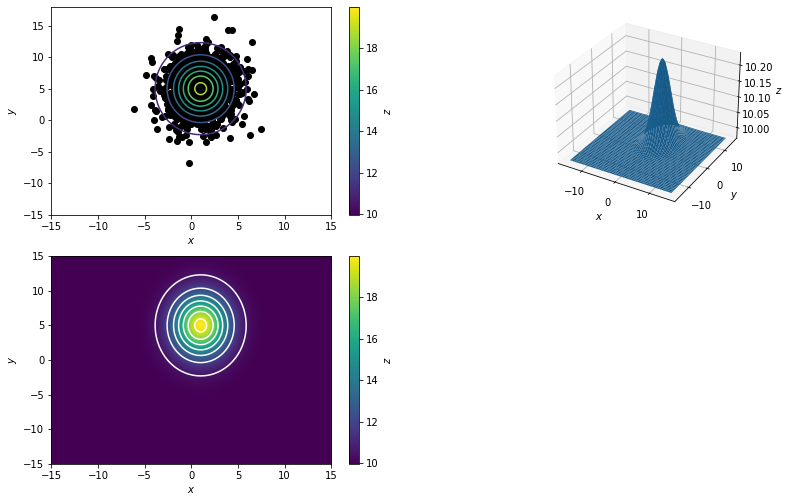

In [12]:
# c.f. https://matplotlib.org/3.1.1/gallery/mplot3d/mixed_subplots.html
# fig = plt.figure(figsize=plt.figaspect(2.))
fig = plt.figure()
fig.set_size_inches(fig.get_figwidth() * 2.3, fig.get_figheight() * 2.1, forward=True)

ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(x_feature, y_feature, color="black")
ax1.contour(x, y, model_predictions.reshape(x.shape))
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")

ax2 = fig.add_subplot(2, 2, 3)
# origin determines how to the data is filled in the bounding box, so here must be "lower"
im = ax2.imshow(
    model((x, y), *params_opt).reshape(x.shape),
    origin="lower",
    extent=(x.min(), x.max(), y.min(), y.max()),
    aspect="auto",
)
ax2.contour(x, y, model_predictions.reshape(x.shape), colors="white")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$")
fig.colorbar(im, label=r"$z$", ax=ax1)
fig.colorbar(im, label=r"$z$", ax=ax2)

ax3 = fig.add_subplot(2, 2, 2, projection="3d")
xy = np.column_stack([x.flat, y.flat])
z = (
    params_opt[0]
    * stats.multivariate_normal.pdf(
        xy, mean=params_opt[1:3], cov=np.diag(params_opt[3:5] ** 2)
    )
    + params_opt[-1]
)
z = z.reshape(x.shape)
ax3.plot_surface(x, y, z)
ax3.set_xlabel(r"$x$")
ax3.set_ylabel(r"$y$")
ax3.set_zlabel(r"$z$");